# Exploratory Data Analysis - Customer Loans in Finance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from load import load_data
from data_transform import DataTransform
from DataFrameInfo import DataFrameInfo
from data_frame_transform import DataFrameTransform
from plotter import Plotter

## Getting the data and taking a first look

First we get the data.  Data were downloaded from an RDS database using credentials provided by AiCore and saved in a CSV format.
We use the imported function to load the data into a Pandas dataframe.  Then we print its shape followed by information about the data.

In [2]:
df = load_data('initial_data.csv')
print(f"The shape of the dataframe is {df.shape}")
#df.info()

The shape of the dataframe is (54231, 43)


We see that the data consists of 54321 observations (rows) of a set of 43 variables (columns).  We investigate further by printing further information about the dataframe.

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

None

Initial observations are that:
- the variables follow a mix of datatypes including 15 objects (strings), 20 floats and 8 integers, making 28 numerical variables
- many variables have a full complement of 54231 observations.  However some variables have missing data and sometimes the gaps are extensive.

## The exploratory analysis - understanding and manipulating the data
Our exploratory analysis will cover five basic stages, undertaken broadly sequentially.  They are
1. Reviewing the appropriateness of datatypes and adjusting as necessary.
2. Handling missing data
3. Considering and handling skewed data
4. Identifying and handling outliers
5. Identifying and handling collinearity among the variables

### 1.  Appropriate datatypes

Let us consider each variable in turn.  We can use the pandas value_counts() functionality to get a quick look at each variable, including a few observations, together with the datatype and the count of unique values.  We can hence observe for example:
- whether numbers or text have been assigned inappropriately;
- whether there is a limited number of distinct values (suggesting that the categorical datatype is an option);
- whether data involve times and dates (suggesting that the datetime datatype is an option).

See datatypes.ipynb for results of value_counts() query.

In [4]:
#for entry in list(df):
#   display(df[entry].value_counts())

We see that in many cases there are no issues with a variable.  We describe below the exceptions to this rule, and discuss the appropriate actions (index numbers refer to the data info output above).

0   id
Data has been assigned as int64.  While these are numeric characters their purpose is only really to label the data.  We should cast to object to reflect this.

1   member_id
Same as issue as id.  We should cast to object.

5   term
Assigned as object datatype, but in fact only takes two values: 36 months or 60 months.  We could assign as a category.  We may also want to strip the text "months" in which case we could cast to numeric.  One advantage here is that we could impute the missing data using the mean.  This decision may need to be revisited when we have a better idea of what role this variable plays in our analysis.  Initially we will strip months, and cast to float.

8   grade
Assigned as object.  In fact, it shows which of 7 grades a loan is categorised by.  We will hence assign as a categorical datatype.
We also need to bear in mind that there is an ordinal relation between the categories and consider whether this will be useful.  One option might be to convert letters to numbers, thus allowing calculating of "average grades."  To be kept under consideration as the analysis proceeds.

9   subgrade
Same issues as grade, albeit with more categories.  
Again, we will cast to category and keep under review how to use the information stored in the "ordinal nature" of this variable.

10  employment_length
Describes employment length in blocks of years up to "10+".  We will convert to category.
We may want to strip years and treat as numerical variable and will note this possibility at this stage.

11  home_ownership
Assigned as object with 3 main populated categories, plus a few "Other" and "None".  We will cast to category and consider later whether to keep or handle Other/None.

13  verification_status
Assigned as object with 3 categories,   We will cast to category.

14  issue_date
Assigned as object but actually represents dates in month/year format.  It might be useful to cast to datetime.  As date objects minimally require day, month, year we will need to assign an arbitrary day value to these observations.  We will add "day 15" and cast to datetime datatype.

15  loan_status
We can cast to category

16  payment_plan
We could cast to category but with a 54230 - 1 split its doubtful that this data will be useful in the analysis anyway.  We will drop.

17  purpose
Assigned as object but actually divides into 14 "pure" categories.   We will cast to category.

20  earliest_credit_line
As issue date.  We will add "day 15" and cast to datetime datatype.

21  inq_last_6_months
Fits into 14 numeric categories.  We can leave as numeric.

35  last_payment_date
As issue date.  We will add "day 15" and cast to datetime datatype.

37  next_payment_date
As issue date.  We will add "day 15" and cast to datetime datatype.

38  last_credit_pull_date
As issue date.  We will add "day 15" and cast to datetime datatype.

41  policy_code
All coded as "1".  It informs us about how we've drawn the sample, but won't be of further use.  Drop.

42  application_type
All are "Individual".  It informs us about how we've drawn the sample, but won't be of further use.  Drop.

We use methods in our DataTransform class to perform these transformations.

First we cast the first two columns to object.

In [5]:
transformer = DataTransform(df)

#transformer.dataframe.info()

target_cols = ['id' , 'member_id']
for entry in target_cols:
    transformer.col_to_object(entry)

#transformer.dataframe.info()

Next we cast seven columns to category.

In [6]:
transformer.dataframe.info()

target_cols = ['grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose']
for entry in target_cols:
    transformer.col_to_category(entry)

transformer.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  object 
 1   member_id                    54231 non-null  object 
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

We address the column "term", by stripping the months part of the text, then casting to float

In [7]:
transformer.strip_months('term')
transformer.col_to_float('term')

transformer.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           54231 non-null  object  
 1   member_id                    54231 non-null  object  
 2   loan_amount                  54231 non-null  int64   
 3   funded_amount                51224 non-null  float64 
 4   funded_amount_inv            54231 non-null  float64 
 5   term                         49459 non-null  float64 
 6   int_rate                     49062 non-null  float64 
 7   instalment                   54231 non-null  float64 
 8   grade                        54231 non-null  category
 9   sub_grade                    54231 non-null  category
 10  employment_length            52113 non-null  category
 11  home_ownership               54231 non-null  category
 12  annual_inc                   54231 non-null  float64 
 13  v

We convert the relevant columns to time, provided there are no null values.  

The following columns have nulls: 'last_payment_date', 'next_payment_date', 'last_credit_pull_date'
We'll consider handling these nulls later, and if they're dropped we will return to this point.

In [8]:
target_cols = ['issue_date', 'earliest_credit_line']
for entry in target_cols:
    transformer.add_day_15(entry)
    transformer.col_to_date(entry)

transformer.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  object        
 1   member_id                    54231 non-null  object        
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  float64       
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  category      
 9   sub_grade                    54231 non-null  category      
 10  employment_length            52113 non-null  category      
 11  home_ownership               54231 non-nu

Finally, we drop the three columns identified.

In [9]:
target_cols = ['policy_code', 'application_type', 'payment_plan']
for entry in target_cols:
    transformer.drop_col(entry)

Checking the appropriateness of datatypes is now complete.  We tidy up our dataframe and save a copy of the dataframe as of this step.

In [10]:
df = transformer.dataframe
df_step_one = df


### 2.  Handling missing data

Missing data is likely to be problematic for our analysis.  At this stage we will identify which variables have missing data and handle this appropriately.

For background, we begin by describing a summary of the numerical (and datetime) variables in our dataset

In [11]:
infogenerator = DataFrameInfo(df)
infogenerator.summarise_numeric()

The dataframe has these numeric datatypes, with these summary statistics


,count,mean,min,25%,50%,75%,max,std
loan_amount,54231.0,13333.0761,500.0,7000.0,12000.0,18000.0,35000.0,8082.196709
funded_amount,51224.0,13229.509117,500.0,7000.0,12000.0,18000.0,35000.0,8019.017599
funded_amount_inv,54231.0,12952.622979,0.0,6700.0,11300.0,18000.0,35000.0,8099.473527
term,49459.0,42.606199,36.0,36.0,36.0,60.0,60.0,10.719573
int_rate,49062.0,13.507328,5.42,10.37,13.16,16.2,26.06,4.392893
instalment,54231.0,400.013953,15.67,224.205,347.15,527.55,1407.01,238.920012
annual_inc,54231.0,72220.848249,3300.0,45000.0,61000.0,86000.0,2039784.0,51589.339577
issue_date,54231,2018-10-01 11:41:04.855894272,2013-06-15 00:00:00,2017-05-15 00:00:00,2019-09-15 00:00:00,2019-11-15 00:00:00,2021-01-15 00:00:00,NaN
dti,54231.0,15.867087,0.0,10.2,15.6,21.26,39.91,7.623124
delinq_2yrs,54231.0,0.241799,0.0,0.0,0.0,0.0,18.0,0.706706


We run a method to show the percentage of missing data in each variable.

In [12]:
infogenerator.count_nulls()

percentage of missing values in each column:
id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   5.544799
funded_amount_inv               0.000000
term                            8.799395
int_rate                        9.531449
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
employment_length               3.905515
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                      0.000000
loan_status                     0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line            0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         57.166565
mths_since_last_record         88.602460
open_account

We see that there are eleven variables in our analysis where missing data is a problem that requires handling.
Possible options for handling the missing data are:
- drop the entire variable (dataframe column)
- drop the observations where data is missing (dataframe rows)
- impute the missing values (using eg the median/mode of the variable, forward/backward filling, or any method appropriate to a specific dataset)

Broadly speaking:  
- if a small number of observations are missing our inclination will be to drop the rows, on the assumption that losing a small number of rows won't cause a great loss of information with our analysis.
- if a medium number of observations are missing our inclination will be to impute the data.  Dropping either the rows or the column would cause significant loss of information
- if a large number of observations are missing our inclination will be to drop the entire variable.  Dropping rows would lose a large amount of our dataset, and imputing would essentially mean that we were making up a large chunk of the variable.

We consider each variable that contains missing data

funded amount    5.5% missing

We don't want to drop the column as this might be important in future tasks regarding indepth analysis.
We could potentially drop the rows, but throwing out over 5% of data in one go isnt ideal.
We could go wth mean or median, but we note a close relationship with the loan amount which has no nulls.
We impute by F = L * E(L)/E(FI).  We separately calculate this multiplier to be 0.992 calculated from rows where both values are present.

term    8.8% missing

With 8.8% missing data, we would like to impute.  We recall this variable is split between observations of 36 months and 60 months.  Since imputing by the median will be to choose one of these extremes, we will choose to impute by the mean here.

int_rate 9.5% missing

We would like to impute. Mean and median are similar, we choose median as we havent addressed outliers yet which could affect the mean.  

employment_length 3.9% missing

We would like to impute.  Inspection shows median employment length is 6 years.  We will impute with this.  We note a risk that this data might not be MCAR for future consideration.

There is also a group of variables that contains very many nulls, namely:
- mths_since_last_delinq
- mths_since_last_record
- next_payment_date
- mths_since_last_major_derog

Its hard to impute appropriately given the large amount of nulls.  This suggests dropping the columns.

A problem is that these may not be MCAR and the fact of null vs non-null data might tell us something interesting.  This depends whether data is simply missing or whether the nulls suggest an event like a major derogation has never happened.

We note this possibility but drop the variables for now.

Further, there is a group of variables with a very small set of nulls:
- last_payment_date
- last_credit_pull_date
- collections_12_mths_ex_med

Here we can drop the rows where we have null values in the relevant column.

We drop the rows where nulls occur in specific columns

In [47]:
dftransformer = DataFrameTransform(df)

#dftransformer.df.info()
target_cols = ['last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med']
for entry in target_cols:
    dftransformer.drop_row(entry)
#dftransformer.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54100 entries, 0 to 54227
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54100 non-null  object        
 1   member_id                   54100 non-null  object        
 2   loan_amount                 54100 non-null  int64         
 3   funded_amount               54100 non-null  float64       
 4   funded_amount_inv           54100 non-null  float64       
 5   term                        54100 non-null  float64       
 6   int_rate                    54100 non-null  float64       
 7   instalment                  54100 non-null  float64       
 8   grade                       54100 non-null  category      
 9   sub_grade                   54100 non-null  category      
 10  employment_length           54100 non-null  category      
 11  home_ownership              54100 non-null  category      


We drop the columns flagged above to be dropped

In [14]:
target_cols = ['mths_since_last_delinq','mths_since_last_record','next_payment_date','mths_since_last_major_derog']
for entry in target_cols:
    dftransformer.drop_col(entry)
#dftransformer.df.info()

We impute the columns as described

In [15]:
dftransformer.impute_by_median('int_rate')
dftransformer.impute_by_mean('term')
dftransformer.impute_constant(col_name = 'employment_length' , constant = "6 years")
dftransformer.impute_constant (col_name = 'funded_amount' , constant = dftransformer.df['loan_amount'] * 0.992)
#dftransformer.df.info()

c:\Users\Elvis\Desktop\aicoretests\EDA\data_frame_transform.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column].fillna(self.df[column].median() , inplace = True)
c:\Users\Elvis\Desktop\aicoretests\EDA\data_frame_transform.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

We confirm that we have eliminated all nulls, and tidy up our df storage, saving a step two complete version.

In [16]:
df=dftransformer.df

infogenerator = DataFrameInfo(df)
infogenerator.count_nulls() 
#dftransformer.df.info()
df_step2 = df

percentage of missing values in each column:
id                            0.0
member_id                     0.0
loan_amount                   0.0
funded_amount                 0.0
funded_amount_inv             0.0
term                          0.0
int_rate                      0.0
instalment                    0.0
grade                         0.0
sub_grade                     0.0
employment_length             0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_date                    0.0
loan_status                   0.0
purpose                       0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_credit_line          0.0
inq_last_6mths                0.0
open_accounts                 0.0
total_accounts                0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_payment                 0.0
total_payment_inv             0.0
total_rec_prncp               0.0
tot

In [48]:
print(len(df_step2))

54100


### 3.  Considering and handling skewed data


We use a method built on pandas built-in methods to assess the skewness of our numerical variables. 

In [17]:
transformer = DataFrameTransform(df)

transformer.show_skew()

loan_amount                    0.804312
funded_amount                  0.819632
funded_amount_inv              0.814251
term                           1.051654
int_rate                       0.456055
instalment                     0.996150
annual_inc                     8.735737
dti                            0.189020
delinq_2yrs                    5.318818
inq_last_6mths                 3.243836
open_accounts                  1.059493
total_accounts                 0.780083
out_prncp                      2.352526
out_prncp_inv                  2.352946
total_payment                  1.269266
total_payment_inv              1.258474
total_rec_prncp                1.262007
total_rec_int                  2.203625
total_rec_late_fee            13.258472
recoveries                    14.382675
collection_recovery_fee       27.794716
last_payment_amount            2.496079
collections_12_mths_ex_med    20.298064
dtype: float64


All skewness values are positive, indicating that every column shows some degree of positive skew.
The question arises as to how much skew is too much.  We'll assume that skew of less than 1 is fine.  Further, skew of less than 2 will probably be OK.
Hence we will investigate those columns where skew exceeds 2.

In [18]:
target_cols = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']

We'll start by plotting the pdf of each of these variables.

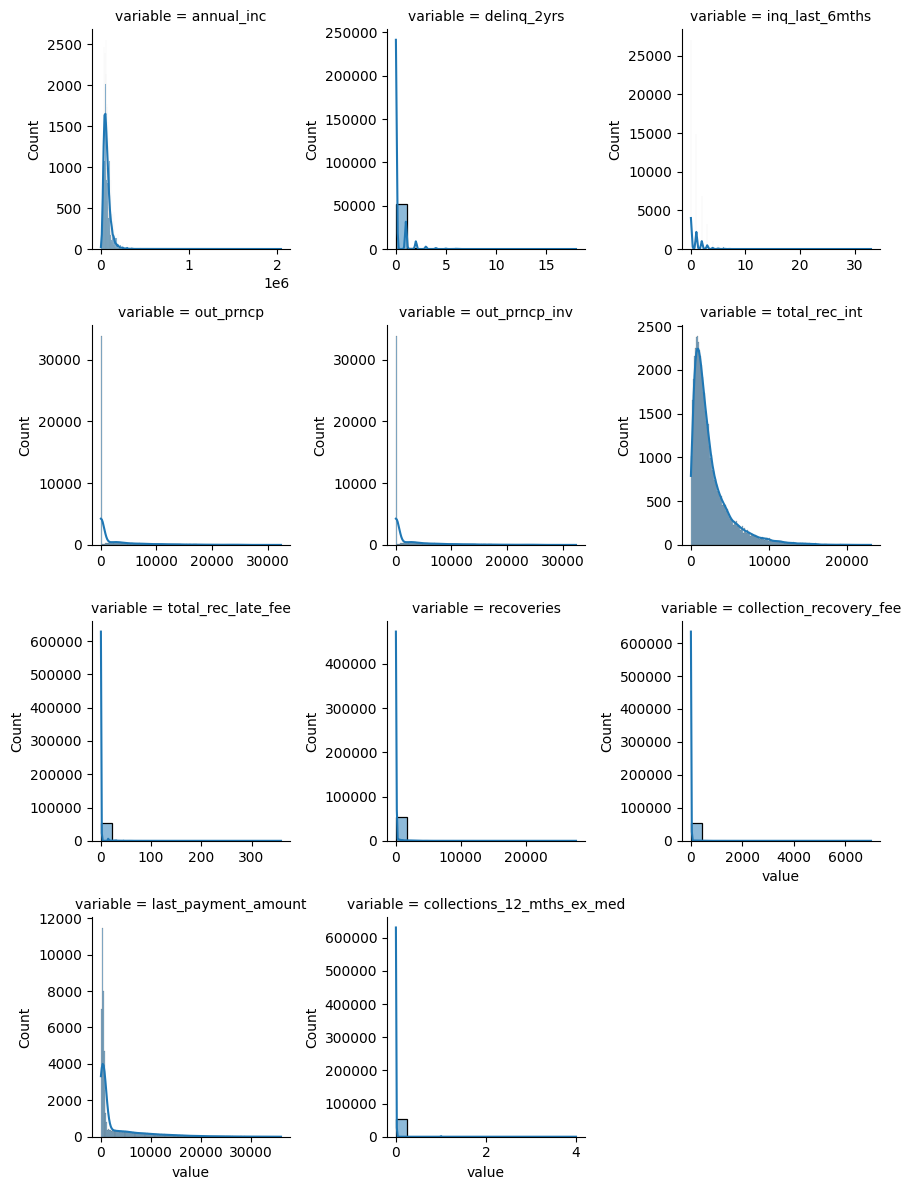

In [19]:
f = pd.melt(df, value_vars=target_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

These plots generally confirm the skewed nature of these variables, with the "fat tail" to the right of the distribution evident.  

Its worth also noting that some of the variables have what might approximate to a "normal" distribution of data, albeit augmented by the right tail.  Other variables don't have such a distribution, but instead have a peak at zero, with a minority of positive observations, and sometimes a tiny majority at that.

We'll try transforming these skewed columns using the basic log transform and look at the results.

In [20]:
for entry in target_cols:
    transformer.log_transform(entry)
transformer.show_skew()


loan_amount                        0.804312
funded_amount                      0.819632
funded_amount_inv                  0.814251
term                               1.051654
int_rate                           0.456055
instalment                         0.996150
annual_inc                         8.735737
dti                                0.189020
delinq_2yrs                        5.318818
inq_last_6mths                     3.243836
open_accounts                      1.059493
total_accounts                     0.780083
out_prncp                          2.352526
out_prncp_inv                      2.352946
total_payment                      1.269266
total_payment_inv                  1.258474
total_rec_prncp                    1.262007
total_rec_int                      2.203625
total_rec_late_fee                13.258472
recoveries                        14.382675
collection_recovery_fee           27.794716
last_payment_amount                2.496079
collections_12_mths_ex_med      

We applied the transformation to eleven columns, and the results are generally improved.
Six columns are adequately transformed, taking a threshold of 2.
However five columns remain problematic:
-    delinq_2yrs (skew = 5.4, basically unchanged)
-    total_rec_late_fee (skew = 5.5, reduced but still high)
-    recoveries (skew = 3.8, reduced but still high)
-    collection_recovery_fee (skew = 5.4)
-    collections_12_mths_ex_med (skew = 65, very high and increased)

We will also revisualise the data.

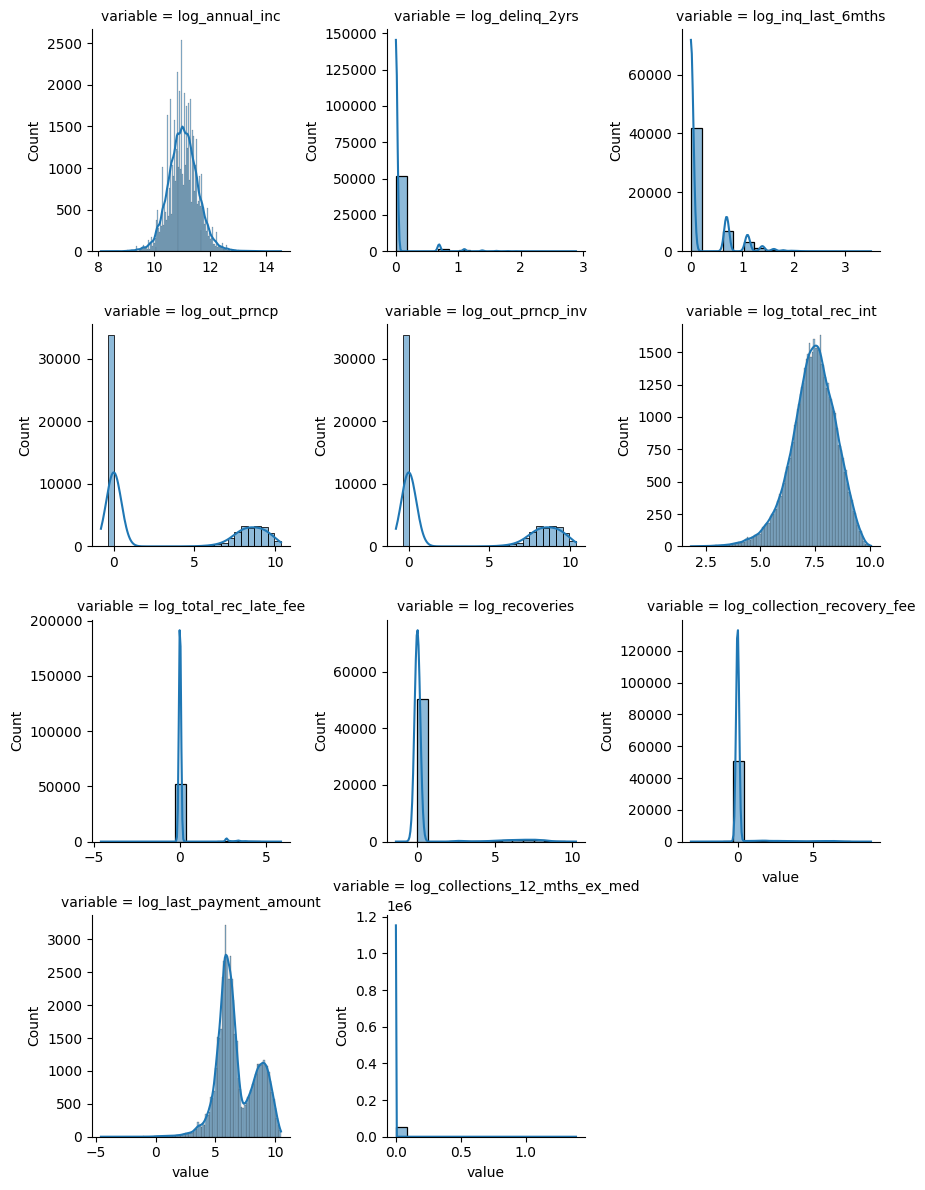

In [21]:
df = transformer.df

log_target_cols = []
for entry in target_cols:
    new_title = "log_" + entry
    log_target_cols.append(new_title)

f = pd.melt(df, value_vars=log_target_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)


The revisualisation suggests that only 2-3 variables have really been transformed into something approaching normality.  These variablesd are:
- annual_inc
- total_rec_int
- last_payment_amount (to a lesser extent).
For these variables we'll stick to the log transformation, and hence drop the original column from our dataframe.

For the other variables, we note for any future analysis that log_out_prncp and log_out_prncp_inv follow a distribution that is somehwat normal / symmetric with the exception of the large number of zero values.  In case this property comes in useful, we'll keep both the log_transform and the untransformed variables in our dataset here.

For the other variables the transformation does not seem to have done us significant favours so we might as well stick with the original variables and drop the log transformed versions.  We'll need to bear in mind that these variables come with a kind of "health warning" if we do want to use them later.  However, skewed data is not necessarily a significant problem; much will depend on the use that we want to put the data, which is unclear at this initial stage.

In [22]:
print(log_target_cols)


['log_annual_inc', 'log_delinq_2yrs', 'log_inq_last_6mths', 'log_out_prncp', 'log_out_prncp_inv', 'log_total_rec_int', 'log_total_rec_late_fee', 'log_recoveries', 'log_collection_recovery_fee', 'log_last_payment_amount', 'log_collections_12_mths_ex_med']


In [23]:
#exclude 'total_rec_int' because we want to access this later. we keep this in log and normal form
cols_to_drop = ['annual_inc', 'last_payment_amount','log_delinq_2yrs', 'log_inq_last_6mths', 'log_total_rec_late_fee', 'log_recoveries', 'log_collection_recovery_fee', 'log_collections_12_mths_ex_med']

transformer = DataFrameTransform(df)
for col in cols_to_drop:
    transformer.drop_col(col)

df = transformer.df

### 4.  Outliers


Its not practical to pairwise plot all variables due to the size of the dataset, and given the size of the datasets it would probably not be revealing.
Its also not the case (subject to clarification in later tasks) that the dataset has an obvious "target variable" to plot other variables against individually.
These are probably the first two strategies that we would normally turn to in order to identify outliers.  Given they are unavailable to us our best practical choice is probably to plot the variables individually using a box-whiskers plot.

In [24]:
print(list(df))


['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'issue_date', 'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'log_annual_inc', 'log_out_prncp', 'log_out_prncp_inv', 'log_total_rec_int', 'log_last_payment_amount']


In [25]:

numeric_variables = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'log_annual_inc', 'log_out_prncp', 'log_out_prncp_inv', 'log_total_rec_int', 'log_last_payment_amount']
'''
for variable in numeric_variables:
    fig = px.box(df, y=variable,width=600, height=500)
    fig.show()
    '''

'\nfor variable in numeric_variables:\n    fig = px.box(df, y=variable,width=600, height=500)\n    fig.show()\n    '

### 5.  Collinearity

Collinearity occurs when explanatory variables are strongly correlated with each other.  If we then want to use these variables to explain a taregt variable it can be difficult to interpret the results, since although the combination of variables may have strong explanatory performance   

In [26]:
display(df[numeric_variables].corr())

,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,dti,delinq_2yrs,inq_last_6mths,open_accounts,...,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,log_annual_inc,log_out_prncp,log_out_prncp_inv,log_total_rec_int,log_last_payment_amount
loan_amount,1.000000,0.994290,0.975552,0.356284,0.203370,0.947044,0.093133,0.015859,-0.036524,0.212816,...,0.690807,0.032443,0.116697,0.068160,0.001607,0.489129,0.218236,0.218205,0.716466,0.346104
funded_amount,0.994290,1.000000,0.982323,0.349868,0.206324,0.955265,0.097352,0.017872,-0.038183,0.214941,...,0.691501,0.031890,0.116189,0.068079,0.002351,0.486858,0.227095,0.227068,0.717787,0.347351
funded_amount_inv,0.975552,0.982323,1.000000,0.356562,0.210227,0.935447,0.109378,0.018918,-0.061253,0.214580,...,0.671163,0.017770,0.108362,0.059888,0.004311,0.474896,0.249789,0.249815,0.707622,0.346108
term,0.356284,0.349868,0.356562,1.000000,0.400649,0.120245,0.084341,0.007671,0.001078,0.056764,...,0.066517,0.006545,0.084166,0.037835,0.003400,0.099485,0.152579,0.152525,0.449737,0.080426
int_rate,0.203370,0.206324,0.210227,0.400649,1.000000,0.191054,0.171911,0.107935,0.163796,0.034623,...,0.003536,0.048146,0.111767,0.059111,0.032757,0.007392,0.114976,0.115005,0.423064,0.052338
instalment,0.947044,0.955265,0.935447,0.120245,0.191054,1.000000,0.092095,0.029650,-0.016302,0.213150,...,0.715780,0.039954,0.108940,0.068307,0.005288,0.482023,0.192962,0.192956,0.664291,0.350598
dti,0.093133,0.097352,0.109378,0.084341,0.171911,0.092095,1.000000,0.007880,-0.018494,0.327818,...,-0.035523,-0.020131,0.017138,0.003748,0.012073,-0.144164,0.192414,0.192430,0.135651,-0.006083
delinq_2yrs,0.015859,0.017872,0.018918,0.007671,0.107935,0.029650,0.007880,1.000000,0.008544,0.060619,...,-0.021319,0.023325,0.010429,0.009562,0.026357,0.073844,0.061175,0.061171,0.045072,-0.007246
inq_last_6mths,-0.036524,-0.038183,-0.061253,0.001078,0.163796,-0.016302,-0.018494,0.008544,1.000000,0.082331,...,-0.018034,0.051465,0.044616,0.038724,-0.006315,0.050848,-0.120377,-0.120359,-0.000867,0.006759
open_accounts,0.212816,0.214941,0.214580,0.056764,0.034623,0.213150,0.327818,0.060619,0.082331,1.000000,...,0.119513,-0.024460,0.009796,0.005676,0.018187,0.262320,0.130169,0.130168,0.148507,0.079612


<Axes: >

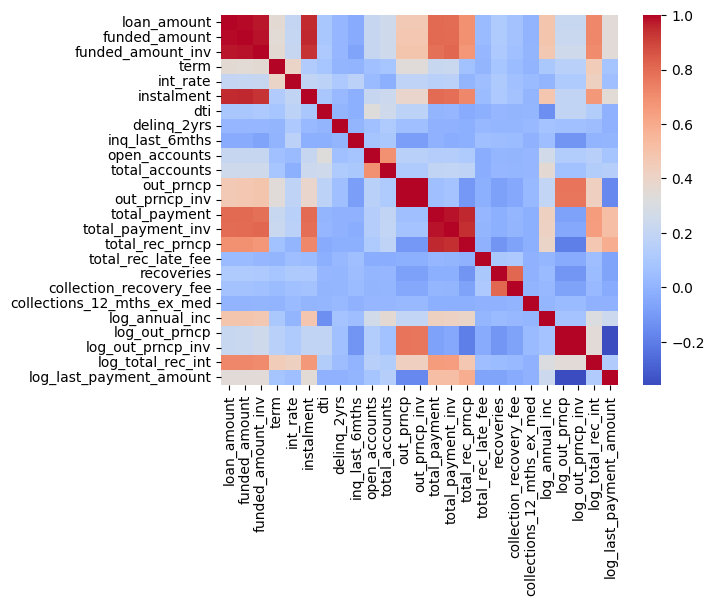

In [27]:
sns.heatmap(df[numeric_variables].corr(), annot=False, cmap='coolwarm')

We can tell a lot about collinearity by simply observing the correlation heatmap above.  In most areas of the datset, collinearity is not a particular problem; the bluer hues dominate.

There are exceptions to this:
- there is strong collinearity between loan_amount, funded_amount, funded_amount_inv, instalment;
- there are further strong areas of collinearity between out_princp_inv and out_princp_inv; and between total_payment, total_payment_inv and total_rec_prncp.

The second groups (especially the latter) show some collinearity with the first group.

It should be noted that this collinearity should not be regarded as surprising.  It makes complete sense that there is a relationship between, say, the loan amount and the instalment or the total payment.  Equally, we have noted that loan amount, funded amount and funded amount (inv) seem related concepts and hence likely collinear.

The next question arising is what to do about this collinearity.  One option is to drop some of the collinear variables, and let the remaining variables "stand in their place".  However, there are strong arguments against this approach.  We could, for example, drop the variables that appear "subsidiary" to loan amount - funded_amount, funded_amount_inv and perhaps instalment.  But for different analytical tasks we may prefer to focus on a different one of these variables.  We also note that collinearity does not "invalidate" results; rather it makes the statistical significance of individual variables difficult to interpret in the presence of collinear variables.

We conclude that we will not drop any variables, but will flag that significant caution would be required should we ever want to use more than one of the collinear variables in an explanatory model such as a regression.

## Further Analysis

### 1. Current state of the loans

The first task is to assess the current state of the loans.  We need to:
(1) identify recovery of loan amount as a percentage of funded amount and funded amount by investors.
(2) project this forward for six months.

The first part is straightforward.  We can directly access and sum total_rec_prncp which represents the recovery amount.  We can then compare this to the sum of funded_amount, funded_amount_inv (and if we want loan_amount) to see how much has been recovered overall.

In [28]:
total_recovery = df['total_rec_prncp'].sum()
total_funded_amount = df['funded_amount'].sum()
total_funded_amount_inv = df['funded_amount_inv'].sum()
percent_recovery_funded = (total_recovery/total_funded_amount) * 100
percent_recovery_funded_inv = (total_recovery/total_funded_amount_inv) * 100

print(f"The percentage of total funded amount recovered is {round(percent_recovery_funded,2)}%")
print(f"The percentage of total investor funding recovered is {round(percent_recovery_funded_inv,2)}%")


The percentage of total funded amount recovered is 71.17%
The percentage of total investor funding recovered is 72.66%


The second part is potentially more complicated.

We need to calculate the payment due each month, and split it between the "interest" component and the "recovering principal" component.

We can see "the instalment".  We can also see the ratio of recovered principal to total payment.  We will assume that this is constant.

This means that Recovered principal per month = RCPM = Instalment * (Total recovered principal / Total payment)

We know that this payment will be due in the first month if the loan status is current.  It will be due in month two only if the loan still remains current.  We can check this by calculating a new outstanding principal variable, Deduced outstanding principal = DOP = outstanding_principal - RCCPM.  

We assume that the payment remains due if DOP > 0.  A similar process tells us whether payments will still be due in 


The first thing that we want to do is calculate how many payments are outstanding on the term of the loan.

The term variable ought to be useful.  However, since we imputed some of these datapoints it would be nice to avoid relying on it if possible.

We can see:
- (a) instalment
- (b) total recovered principal
- (c) total payment

We'll assume that (b) is a constant proprtion of (c)

This means that:
RCPM = Instalment * (Total recovered principal / Total payment)
implied_togo = out_prncp / RCPM

status_current = 

In [43]:
target_categories = ['Current', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default']

df ['current_status'] = df['loan_status'].isin(target_categories) 

df['RCPM'] = df['instalment'] * df ['total_rec_prncp'] / df ['total_payment']

df['implied_to_go'] = df['out_prncp'] * df['current_status'] / df['RCPM']



payments = {}

df['mth_1'] = df['current_status'] * df['RCPM']
df['implied_to_go'] -= 1
df ['still_live'] = df['implied_to_go'] > 0
payments[1] = int(df['mth_1'].sum())

for i in range(5):
    df['this_mth'] = df['still_live'] * df['RCPM']
    df['implied_to_go'] -= 1
    df ['still_live'] =  df['implied_to_go'] > 0
    payments[i+2] = int(df['this_mth'].sum())

#print(df['instalment'].sum())
print(payments)

{1: 6140872, 2: 6125069, 3: 6103511, 4: 6089008, 5: 6069356, 6: 6046283}


In [44]:
display(df.head(15).transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,38676116,38656203,38656154,38656128,38656121,38656111,38656110,38656067,38656063,38656052,38656023,38656004,38656003,38655994,38655931
member_id,41461848,41440010,41439961,41439934,41439927,41439917,41439916,41439872,41439868,41439857,41439828,41439809,41439808,41439798,41439735
loan_amount,8000,13200,16000,15000,15000,2525,6675,26500,10000,10000,7200,2000,6000,10000,7675
funded_amount,8000.0,13200.0,16000.0,15000.0,15000.0,2525.0,6675.0,26500.0,10000.0,9920.0,7200.0,2000.0,6000.0,10000.0,7675.0
funded_amount_inv,8000.0,13200.0,16000.0,15000.0,15000.0,2525.0,6675.0,26200.0,10000.0,10000.0,7200.0,2000.0,6000.0,10000.0,7675.0
term,36.0,36.0,36.0,36.0,36.0,36.0,42.615104,42.615104,60.0,36.0,36.0,36.0,36.0,42.615104,36.0
int_rate,7.49,6.99,7.49,14.31,6.03,11.44,21.99,19.99,12.99,8.19,8.19,10.49,12.39,6.99,13.66
instalment,248.82,407.52,497.63,514.93,456.54,83.2,254.89,701.95,227.48,314.25,226.26,65.0,200.41,308.73,261.05
grade,A,A,A,C,A,B,E,E,C,A,A,B,C,A,C
sub_grade,A4,A3,A4,C4,A1,B4,E5,E3,C2,A5,A5,B3,C1,A3,C3


### 2.  Calculating loss

In [31]:
charged_off_categories = ['Charged Off', 'Does not meet the credit policy. Status:Charged Off']

df ['charged_off_status'] = df['loan_status'].isin(charged_off_categories) 

percent_charged_off = df ['charged_off_status'].sum() * 100 / len(df)
#paid_before_chargeoff = df['charged_off_status'] * df 

df['paid_before_chargeoff'] = df['charged_off_status'] * df['total_payment']

total_paid_before_chargeoff = df['paid_before_chargeoff'].sum()

print(f"Percentage of loan base charged off: {round(percent_charged_off, 2)}%")
print (f"Total payments on charged off loans:  {int(total_paid_before_chargeoff)}")

Percentage of loan base charged off: 10.82%
Total payments on charged off loans:  39092575


### 3.  Calculating projected loss

Calculate projected loss of loans marked as charged off.

We're going to assume that loss means unrecovered principal.

In [32]:
charged_off_categories = ['Charged Off', 'Does not meet the credit policy. Status:Charged Off']

df ['charged_off_status'] = df['loan_status'].isin(charged_off_categories)

df['unrec_prncp'] = df['charged_off_status'] * (df ['loan_amount'] - df ['total_rec_prncp'])

df['initial_value_charged_off']  = df['charged_off_status'] * (df ['loan_amount'])

initial_value_chargeoffs = df['initial_value_charged_off'].sum()
projected_loss = df['unrec_prncp'].sum()

print(int(projected_loss))
percent_loss = 100 * projected_loss / initial_value_chargeoffs
#print(percent_loss)
print(f"The loss as a percentage of loan amount was {round(percent_loss, 1)}%")

58159592
The loss as a percentage of loan amount was 73.4%


Calculate the loss in revenue these loans would have generated for the company if they had finished their term. Visualise the loss projected over the remaining term of these loans.

In [46]:
charged_off_categories = ['Charged Off', 'Does not meet the credit policy. Status:Charged Off']

df ['current_status'] = df['loan_status'].isin(charged_off_categories) 

df['RCPM'] = df['instalment'] * df ['total_rec_prncp'] / df ['total_payment']

df['implied_to_go'] = df['unrec_prncp'] / df['RCPM']

df ['still_live'] =  df['implied_to_go'] > 0

payments = {}
'''
df['mth_1'] = df['current_status'] * df['instalment']
df['implied_to_go'] -= 1
df ['still_live'] =  df['implied_to_go'] > 0
payments[1] = int(df['mth_1'].sum())
'''
for i in range(60):
    df['this_mth'] = df['still_live'] * df['instalment']
    df['implied_to_go'] -= 1
    df ['still_live'] =  df['implied_to_go'] > 0
    payments[i+1] = int(df['this_mth'].sum())


print(payments)

{1: 2334866, 2: 2334016, 3: 2329712, 4: 2326116, 5: 2319789, 6: 2314824, 7: 2310700, 8: 2301711, 9: 2294390, 10: 2286203, 11: 2278693, 12: 2268658, 13: 2259596, 14: 2248680, 15: 2236594, 16: 2223544, 17: 2196495, 18: 2178431, 19: 2148074, 20: 2110732, 21: 2071331, 22: 2036412, 23: 1997734, 24: 1951024, 25: 1915544, 26: 1881399, 27: 1837635, 28: 1800919, 29: 1762603, 30: 1727751, 31: 1690060, 32: 1651021, 33: 1609514, 34: 1571055, 35: 1533551, 36: 1487730, 37: 1447333, 38: 1403562, 39: 1365898, 40: 1328889, 41: 1293101, 42: 1262454, 43: 1235606, 44: 1209031, 45: 1184193, 46: 1162686, 47: 1146826, 48: 1131187, 49: 1112630, 50: 1095376, 51: 1083518, 52: 1064741, 53: 1053717, 54: 1039623, 55: 1030594, 56: 1019495, 57: 1003950, 58: 987001, 59: 971918, 60: 957048}


### 4.  Possible loss

"There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue.


What percentage do users' in this bracket currently represent as a percentage of all loans? Calculate the total amount of customers in this bracket and how much loss the company would incur their status was changed to Charged Off. What is the projected loss of these loans if the customer were to finish the full loans term?


If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?"



In [55]:
late_categories = ['Late (31-120 days)' , 'In Grace Period' , 'Late (16-30 days)' , 'Default']
df['late_status'] = df['loan_status'].isin(late_categories)
print(f"Customers in payment difficulty:  {df['late_status'].sum()}")
print(f"As percent of total loans: {100 * df['late_status'].sum() / len(df)}")

df['possible_loss'] = df['late_status'] * (df['loan_amount'] - df['out_prncp'])
total_possible_loss = df['possible_loss'].sum()
print(f"Amount of loss if these customers converted to charged off: {total_possible_loss}")

Customers in payment difficulty:  1003
As percent of total loans: 1.853974121996303
Amount of loss if these customers converted to charged off: 6748026.989999999


We now turn to the "projected loss of these loans if the customer were to finish the full loans term".  Its not entirely clear what this means, since finishing the full loans term ought to mean no loss in principal.  One interpretation is that we need to attempt to calculate recovered principal to date compared to the scheduled recovery, and extrapolate across the remaining loan period,  However, the structure we've picked and the information available don't readily allow this calculation.  We interpret this to be the amount of revenue lost 

In [58]:
today = df['last_payment_date'].max()
print(today)

Sep-2021


In [41]:
'''df ['current_status'] = df['loan_status'].isin(target_categories) 

df['RCPM'] = df['instalment'] * df ['total_rec_prncp'] / df ['total_payment']

df['implied_to_go'] = df['out_prncp'] / df['RCPM']
'''

In [42]:
display(df.head(15).transpose())


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,38676116,38656203,38656154,38656128,38656121,38656111,38656110,38656067,38656063,38656052,38656023,38656004,38656003,38655994,38655931
member_id,41461848,41440010,41439961,41439934,41439927,41439917,41439916,41439872,41439868,41439857,41439828,41439809,41439808,41439798,41439735
loan_amount,8000,13200,16000,15000,15000,2525,6675,26500,10000,10000,7200,2000,6000,10000,7675
funded_amount,8000.0,13200.0,16000.0,15000.0,15000.0,2525.0,6675.0,26500.0,10000.0,9920.0,7200.0,2000.0,6000.0,10000.0,7675.0
funded_amount_inv,8000.0,13200.0,16000.0,15000.0,15000.0,2525.0,6675.0,26200.0,10000.0,10000.0,7200.0,2000.0,6000.0,10000.0,7675.0
term,36.0,36.0,36.0,36.0,36.0,36.0,42.615104,42.615104,60.0,36.0,36.0,36.0,36.0,42.615104,36.0
int_rate,7.49,6.99,7.49,14.31,6.03,11.44,21.99,19.99,12.99,8.19,8.19,10.49,12.39,6.99,13.66
instalment,248.82,407.52,497.63,514.93,456.54,83.2,254.89,701.95,227.48,314.25,226.26,65.0,200.41,308.73,261.05
grade,A,A,A,C,A,B,E,E,C,A,A,B,C,A,C
sub_grade,A4,A3,A4,C4,A1,B4,E5,E3,C2,A5,A5,B3,C1,A3,C3
